# What Kind of Studio Should Microsoft Be? 
Steven and Allison

Module 1 Project

### Table of Contents###

1.  <a href='TheProblemStatement'>The Problem Statement </a>
2.  <a href ='methodology'>Methodology and Approach</a>
3.  <a href='sources'>Data Sources</a>
4.  <a href ='clean'>Data Cleaning</a>
5.  <a href = 'clean2'>Data Cleaning Continued</a>
6.  <a href = 'merge'>Merging the Datasets</a>
7.  <a href='studio'>Categorizing Studio Size</a>
8.  <a href='findings'>Key Findings</a>
9.  <a href='conclusions'>Conclusions and Recommendations</a>
10. <a href='next'>Next Steps</a>

<a id='TheProblemStatement'></a>
## The Problem Statement###

**Which Types of Studios are Associated with Successful Films?**

Our main aim for this analysis was to inform Microsoft's approach to the movie industry. As a first step, we sought to understand which types of studios were associated with successful films. We also explored the production budgets and worldwide gross revenue associated with these films. 

<a id ='methdology'></a>
## Methodology and Approach

We define "successful" studios using the metric of return on investment (ROI). We calculate ROI as gross sales less production budget. ROI is a well-established KPI that shows the return per dollar invested. We selected ROI because it is a monetary measure--which captures the profit-seeking motive behind Microsoft's entry into the movie industry--and also because ROI accounts for the effects of inflation.

Our unit of analysis is studio size. We selected, cleaned and merged datasets which had three variables of interest: film production budgets, film worldwide gross revenue, and studio name. We created three new variables: ROI, net revenue, and studio_size--which we categorized into three groups based on total production budget for films produced over the 2010 to 2018 period). 

The key questions we asked in our analysis were:
 - How did differently sized movie studios perform over the time period? 
 - Which budget sizes result in the highest impact per dollar?
 - Did certain-sized studios produce higher-revenue films? 

<a id='sources'></a>
## Data Sources

Our **first** data source is TheNumbers.com. The dataset contains information on release dates, domestic and worldwide gross income, and production budgets. This dataset has information on nearly 6,000 movies spanning a time period from 1915 to not-yet-released films scheduled for 2020. 

Our **second** data source is Box Office Mojo. The dataset contains information on year of release, domestic and foreign sales, and studios. This dataset contains information on over 3,000 movies released from 2010 through 2018. 

We used the information in the first dataset to calculate two metrics: ROI and net revenue. We used information on studios from the second dataset. We then calculated 'studio_size' based on production budgets for studios in the dataset. 


##### Import Libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='first'></a>
#### First Dataset ####

In [172]:
movies_df = pd.read_csv('./data/tn.movie_budgets.csv.gz') #read in datafile

In [173]:
movies_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [174]:
movies_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [175]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [176]:
movies_df.shape

(5782, 6)

<a id= 'second'></a>
#### Second Dataset####

In [177]:
studio_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [178]:
studio_df.shape

(3387, 5)

<a id = 'clean' ></a>
### Data Cleaning

We cleaned the datasets individually, following the steps below:
 - Check for null values
 - Check for duplicate values
 - Change 'release_date' to a date-time object
 - Change monetary figures from strings to integers

In [179]:
movies_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The dataframe did not appear to contain any explicitly null values.

In [180]:
movies_df[movies_df.duplicated(subset = 'id')].head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
100,1,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377"
101,2,"Nov 22, 2017",Coco,"$175,000,000","$209,726,015","$798,008,101"
102,3,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695"
103,4,"Mar 27, 2009",Monsters vs. Aliens,"$175,000,000","$198,351,526","$381,687,380"
104,5,"Jun 16, 2017",Cars 3,"$175,000,000","$152,901,115","$383,541,369"


In [181]:
# drop id column
movies_df = movies_df.drop(columns = 'id')

We noted that the "id" column had many duplicate values. Since it was not pertinent to our analysis, we deleted this column. 

We then changed the "release_date" column to a datetime object so we could sort by most recent to oldest films. 

In [182]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [183]:
movies_df = movies_df.sort_values(by = 'release_date')

In [184]:
movies_df.reset_index().head()

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,5677,1915-02-08,The Birth of a Nation,"$110,000","$10,000,000","$11,000,000"
1,5523,1916-09-05,Intolerance,"$385,907",$0,$0
2,5614,1916-12-24,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5683,1920-09-17,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5606,1925-11-19,The Big Parade,"$245,000","$11,000,000","$22,000,000"


In [185]:
movies_df = movies_df.drop(movies_df.tail(39).index)

In [186]:
movies_df.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4132,2019-03-29,Unplanned,"$6,000,000","$18,107,621","$18,107,621"
496,2019-04-05,Shazam!,"$85,000,000","$139,606,856","$362,899,733"
2460,2019-04-05,Pet Sematary,"$21,000,000","$54,724,696","$109,501,146"
3633,2019-04-05,The Best of Enemies,"$10,000,000","$10,205,616","$10,205,616"
1176,2019-04-12,Hellboy,"$50,000,000","$21,903,748","$40,725,492"


We decided to drop the most recent 39 films in the dataset, since the dataset contained films that had not yet been released. Additionally, recent films had incomplete data so we dropped them from the dataset.

In [187]:
movies_df[movies_df['worldwide_gross']=='$0'].head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5523,1916-09-05,Intolerance,"$385,907",$0,$0
4984,1927-08-12,Wings,"$2,000,000",$0,$0
4559,1930-11-15,Hell's Angels,"$4,000,000",$0,$0
5180,1936-10-20,The Charge of the Light Brigade,"$1,200,000",$0,$0
5154,1941-10-28,How Green Was My Valley,"$1,250,000",$0,$0


The above shows that we still have a significant number of films with a value of USD 0 for 'worldwide_gross'. It is unclear whether this data is missing or whether these films actually had USD 0 gross revenue. 

In [188]:
movies_df['production_budget'] = movies_df['production_budget'].str.replace(',','')
movies_df['production_budget'] = movies_df['production_budget'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,"$10,000,000","$11,000,000"
5523,1916-09-05,Intolerance,385907,$0,$0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,"$8,000,000","$8,000,000"
5683,1920-09-17,Over the Hill to the Poorhouse,100000,"$3,000,000","$3,000,000"
5606,1925-11-19,The Big Parade,245000,"$11,000,000","$22,000,000"


In [189]:
movies_df['domestic_gross'] = movies_df['domestic_gross'].str.replace(',','')
movies_df['domestic_gross'] = movies_df['domestic_gross'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,10000000,"$11,000,000"
5523,1916-09-05,Intolerance,385907,0,$0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,"$8,000,000"
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,"$3,000,000"
5606,1925-11-19,The Big Parade,245000,11000000,"$22,000,000"


In [190]:
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].str.replace(',','')
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].str.replace('$', '')
movies_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
5677,1915-02-08,The Birth of a Nation,110000,10000000,11000000
5523,1916-09-05,Intolerance,385907,0,0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
5606,1925-11-19,The Big Parade,245000,11000000,22000000


In [191]:
movies_df['production_budget'] = movies_df['production_budget'].astype(int)
movies_df['worldwide_gross'] = movies_df['worldwide_gross'].astype('int64')
movies_df['domestic_gross'] = movies_df['domestic_gross'].astype(int)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 5677 to 1176
Data columns (total 5 columns):
release_date         5743 non-null datetime64[ns]
movie                5743 non-null object
production_budget    5743 non-null int32
domestic_gross       5743 non-null int32
worldwide_gross      5743 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 224.3+ KB


We converted the production budget, domestic, and worldwide gross columns into integer datatypes, as they had been stored as string values. This will allow us to calculate ROI and net revenue.  

In [192]:
movies_df[(movies_df['domestic_gross'] > movies_df['worldwide_gross'])]

,release_date,movie,production_budget,domestic_gross,worldwide_gross


We made an **assumption** that domestic gross is included in the worldwide gross figures. As demonstrated above, there are no instances where domestic gross figures are higher than worldwide gross, indicating that our assumption may be valid. 

In [193]:
movies_df['roi'] = movies_df['worldwide_gross'] / movies_df['production_budget']

In [194]:
movies_df['net_revenue'] = movies_df['worldwide_gross'] - movies_df['production_budget']

In [195]:
movies_df.drop('domestic_gross', axis = 1, inplace = True)

Finally, we created  **three new features** --'roi', 'net_revenue', 'movie_budget_size'--and we dropped the 'domestic_gross' column.

<a id="clean2"> </a>
### Data Cleaning Continued

In [196]:
studio_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [197]:
studio_df[studio_df['title'].duplicated()]

,title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [198]:
studio_df[studio_df['title'] == 'Bluebeard'] #these aren't actually duplicates

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


We note that 'domestic_gross' and 'foreign_gross' columns have missing values. However, we decided to keep the dataset as is because our main interest is the studios. Although we already captured domestic and foreign gross values in the first data source, we keep these values in case they can fill in any gaps in our first dataset.

<a id='merge'></a>
### Merging the Datasets ###

To merge the datasets, we first had to create a unique identifier column. To do so, we created a new column 'title_year', which concatenated two strings--the movie title and the year of release. We created this column in both datasets and performed an inner merge with 'title_year' as the primary key. The resulting dataframe contained data on 1215 movies. This is much smaller than our initial dataset, but presents enough information to provide some insights on studio size as it relates to film success. 
The dataset also now spans the time period 2010 through 2018. 

In [199]:
movies_df['year'] = movies_df['release_date'].dt.year
movies_df['year'] = movies_df['year'].astype(str)
movies_df.rename(columns = {'movie': 'title'}, inplace = True) 
movies_df['title_year'] = movies_df['title'] + ' ' + movies_df['year'] # make new column: title + year in movies

In [200]:
studio_df['year'] = studio_df['year'].astype(str)
studio_df['title_year'] = studio_df['title'] + ' ' + studio_df['year'] # make new column: title + year in studio

In [201]:
merged_df = movies_df.merge(studio_df, on = 'title_year', how = 'inner')

In [202]:
merged_df[merged_df['title_year'].duplicated()]

,release_date,title_x,production_budget,worldwide_gross,roi,net_revenue,year_x,title_year,title_y,studio,domestic_gross,foreign_gross,year_y


In [203]:
merged_df = merged_df[merged_df['title_year'] != 'Home 2009']

We only found one duplicate, which ended up being a free film (no revenue), so we deleted it from our dataset.

In [204]:
merged_df.shape

(1215, 13)

In [205]:
merged_df[(merged_df['worldwide_gross'] == 0)]

,release_date,title_x,production_budget,worldwide_gross,roi,net_revenue,year_x,title_year,title_y,studio,domestic_gross,foreign_gross,year_y


In [206]:
merged_df = merged_df.drop(['domestic_gross', 'foreign_gross'], axis = 1)
merged_df = merged_df.drop(['title_y', 'year_y'], axis = 1)
merged_df = merged_df.drop(['year_x', 'title_x'], axis = 1)

The inner merge removed our worldwide_gross values that were coded as USD 0. Therefore, we can drop the domestic and foreign gross columns from the studio dataset, and drop the titles and years columns. 

In [207]:
merged_df.shape

(1215, 7)

The dataset is much smaller after the inner join. The movies span release years from 2010 to 2018.

In [208]:
merged_df['release_date'].dt.year.value_counts()

2010    180
2011    161
2015    142
2012    141
2016    138
2013    137
2014    124
2017     99
2018     93
Name: release_date, dtype: int64

<a id='studio'></a>
### Categorizing Studio Size

We created a new variable ('studio_size') which segmented studios into three categories: small, medium, and large. There were 96 unique studios in our dataset. One metric to use to categorize by size could be market share. However, this would be difficult to represent across the timescale of our dataset (2010-2018). Another metric could be the average yearly production budgets. However, this data is difficult to find. Therefore, we used available data to **estimate** studio size based on the total production budgets by studio for the films in the dataset. This approach has its limitations. It is possible that studios produced more films over the 2010-2018 timeframe than are present in our dataset, and thus not factored into total production budget figures.  

In [209]:
merged_df['studio'].nunique()

96

In [210]:
size = merged_df.groupby(['studio'])['production_budget'].sum()
size = pd.DataFrame(size)
size.head()

,production_budget
studio,
3D,5000000.0
A24,143100000.0
ATO,12500000.0
Affirm,7000000.0
Alc,10000000.0


**We categorized studio sizes as follows:**
 - "Large" studios have total production budgets in the tens and hundreds of billions. 
 - "Medium" studios have total production budgets in the billions.
 - "Small" studios have total production budgets in the millions and smaller. 

In [211]:
size['production_budget'] = size['production_budget'].astype(str)
size['studio_size'] = size['production_budget'].map(lambda x: len(x))
size['studio_size'].replace([12, 11, 10, 9, 8], ["Large", "Large", "Medium", "Small", "Small"], inplace = True)

In [212]:
final_df = merged_df.merge(size, on = 'studio', how = 'inner')

In [213]:
final_df.drop(['production_budget_y'], axis = 1, inplace = True)

In [214]:
final_df['studio_size'].value_counts()

Large     1085
Medium      97
Small       32
Name: studio_size, dtype: int64

In [215]:
final_df.head()

,release_date,production_budget_x,worldwide_gross,roi,net_revenue,title_year,studio,studio_size
0,2010-01-08,18000000,19685588,1.093644,1685588,Youth in Revolt 2010,W/Dim.,Large
1,2010-08-20,24000000,83660160,3.485840,59660160,Piranha 3D 2010,W/Dim.,Large
2,2011-04-15,40000000,95989590,2.399740,55989590,Scream 4 2011,W/Dim.,Large
3,2011-08-19,27000000,80681183,2.988192,53681183,Spy Kids: All the Time in the World 2011,W/Dim.,Large
4,2011-09-02,5000000,26517819,5.303564,21517819,Apollo 18 2011,W/Dim.,Large


After creating our new variable 'studio_size' and dropping unnecessary columns, we exported our dataset as a csv file. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D79AB2400>]],
      dtype=object)

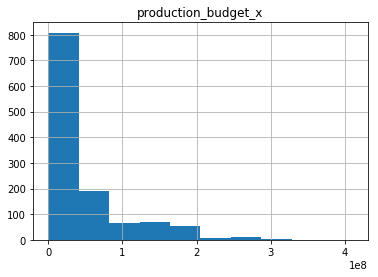

In [227]:
final_df.hist('production_budget_x')

In [248]:
final_df['prod_to_str'] = final_df['production_budget_x'].astype(str)

In [249]:
final_df['movie_budget_size'] = final_df['prod_to_str'].map(lambda x: len(x))
final_df.head()

,release_date,production_budget_x,worldwide_gross,roi,net_revenue,title_year,studio,studio_size,prod_to_str,movie_budget_size
0,2010-01-08,18000000,19685588,1.093644,1685588,Youth in Revolt 2010,W/Dim.,Large,18000000,8
1,2010-08-20,24000000,83660160,3.485840,59660160,Piranha 3D 2010,W/Dim.,Large,24000000,8
2,2011-04-15,40000000,95989590,2.399740,55989590,Scream 4 2011,W/Dim.,Large,40000000,8
3,2011-08-19,27000000,80681183,2.988192,53681183,Spy Kids: All the Time in the World 2011,W/Dim.,Large,27000000,8
4,2011-09-02,5000000,26517819,5.303564,21517819,Apollo 18 2011,W/Dim.,Large,5000000,7


In [250]:
final_df['movie_budget_size'].value_counts()

8    768
7    239
9    187
6     19
5      1
Name: movie_budget_size, dtype: int64

In [251]:
final_df['movie_budget_size'].replace([9, 8, 7, 6, 5], ["Blockbuster", "Blockbuster", "Medium", "Cheap", "Cheap"], inplace = True)

In [252]:
final_df.drop('prod_to_str', axis = 1, inplace = True)

In [253]:
final_df.head()

,release_date,production_budget_x,worldwide_gross,roi,net_revenue,title_year,studio,studio_size,movie_budget_size
0,2010-01-08,18000000,19685588,1.093644,1685588,Youth in Revolt 2010,W/Dim.,Large,Blockbuster
1,2010-08-20,24000000,83660160,3.485840,59660160,Piranha 3D 2010,W/Dim.,Large,Blockbuster
2,2011-04-15,40000000,95989590,2.399740,55989590,Scream 4 2011,W/Dim.,Large,Blockbuster
3,2011-08-19,27000000,80681183,2.988192,53681183,Spy Kids: All the Time in the World 2011,W/Dim.,Large,Blockbuster
4,2011-09-02,5000000,26517819,5.303564,21517819,Apollo 18 2011,W/Dim.,Large,Medium


In [254]:
final_csv = final_df.to_csv('./data/final_df.csv')

<a id='findings'></a>
## Key Findings ##

We explored several questions to better understand **which types of studios are associated with successful films.**

In [90]:
# Change figures to USD millions 
final_df['production_budget_x'] = np.round(final_df['production_budget_x'].map(lambda x: x/1_000_000), 2)
final_df['worldwide_gross'] = np.round(final_df['worldwide_gross'].map(lambda x: x/1_000_000), 2)
final_df['net_revenue'] = np.round(final_df['net_revenue'].map(lambda x: x/1_000_000), 2)
final_df['roi'] = np.round(final_df['roi'], 2)

**Table 1: Film ROI Statistics By Studio Size**

In [91]:
final_df.groupby('studio_size')['roi'].describe()

,count,mean,std,min,25%,50%,75%,max
studio_size,,,,,,,,
Large,1085.0,4.665825,14.240693,0.00,1.39,2.62,4.5100,416.56
Medium,97.0,2.555876,4.369614,0.01,0.43,1.00,2.6200,31.02
Small,32.0,1.605625,2.086806,0.01,0.24,0.79,2.4575,9.54


From Table 1, we see large studios have produced 89% of the films in our dataset. The distributions of film ROI values for all categories of studios is positively skewed, with large outliers in particular for large studios. Large studios have the highest median ROI at 2.62, followed by medium studios at 1 and small studios at 0.79. 

**Table 2: Average ROI and Average Production Budget for Films Released over 2010-2018, by Studio**

In [93]:
final_df.pivot_table(values = ['roi', 'production_budget_x'], index = ['studio', 'studio_size']).sort_values(by = 'roi', ascending = False)[0:15]

,,production_budget_x,roi
studio,studio_size,,
WB (NL),Large,58.070270,17.495405
FD,Large,25.805556,12.568889
UTV,Medium,7.133333,12.173333
Orch.,Small,2.500000,9.540000
GrtIndia,Medium,30.000000,8.780000
BH Tilt,Medium,2.800000,7.894000
Uni.,Large,56.293043,6.886174
Par.,Large,65.930556,6.856806
TriS,Large,27.488889,5.917222


This table shows the studios with the top highest average ROI for their films in our dataset. It is notable that there are a mix of studio sizes, and that net revenue figures vary widely. 

**Table 3: ROI, Net Revenue and Production Budget of Top 15 Films**

In [43]:
final_df.pivot_table(values = ['roi', 'production_budget_x'], index = 'title_year').sort_values(by = 'roi', ascending = False)[0:15]

NameError: name 'final_df' is not defined

Table 3 shows the fifteen films that were most successful according to our ROI metric. The median production budget for the entire dataset is 27 USD million, and budgets range from 500,000 to 410.6 million. We can see the top films have relatively small production budgets, all less than 10 million--smaller than the median and average. 

In [59]:
final_df['production_budget_x'].describe()

count    1214.000000
mean       47.649646
std        56.367633
min         0.050000
25%        10.000000
50%        27.000000
75%        60.000000
max       410.600000
Name: production_budget_x, dtype: float64

<a id='conclusions'></a>
## Conclusions and Recommendations ##

<a id = 'next'></a>
## Next Steps
 - More accurate data on production budgets / studio size

 - Genres
 - Production budget range 
 - Popularity (some kind of metric) / review ratings
 - Independent or major studio
     - Range of ROI
 - How do sequels perform in comparison to originals?
 - Season of release
 - Actors ? 
 - idea - create subset of 0s for second analysis on what not to do. (only if time!)
